<b><font size=5>Определение стоимости автомобилей</font></b><a name="0."></a>

В данной работе необходимо построить модель для определения стоимости. В распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей.

Заказчику важны:

* качество предсказания
* скорость предсказания
* время обучения.

<b><font size=5>Содержание</font></b><a name="to_content."></a>
* [Описание проекта](#0.)
* [Описание данных](#1.)
* [Задачи](#2.)
*  [Подготовка и исследование данных](#3.)
     - [Первые выводы](#3.1.)
     - [Первичная предобработка](#3.2.)     
     - [Обработка пропусков](#3.3.)
     - [Кодировка данных](#3.4.)
* [Обчение моделей](#4.) 
* [Общий вывод](#5.)

<b><font size=5>Описание данных</font></b><a name="1."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

<b>Признаки</b>

* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* NotRepaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя

<b>Целевой признак</b>

* Price — цена (евро)

<b><font size=5>Задачи:</font></b><a name="2."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

1. Загрузить,подготовить и исследовать данные.
2. Обучить разные модели. 
3. Проанализировать скорость работы и качество моделей.
4. Выбрать наулилучшую модель по 3 параметрам: качество, скорость и время обучения.

<b><font size=5>Подготовка и исследование данных</font></b><a name="3."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

In [1]:
import pandas as pd

import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split

import category_encoders as ce
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
df = pd.read_csv('***')

In [3]:
df.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
174758,2016-03-31 09:36:43,500,small,1998,manual,60,ibiza,100000,3,petrol,seat,no,2016-03-31 00:00:00,0,34346,2016-04-06 03:44:31
142771,2016-03-27 20:49:20,3899,wagon,2001,manual,131,passat,150000,5,gasoline,volkswagen,no,2016-03-27 00:00:00,0,98673,2016-04-05 19:45:26
225380,2016-03-27 10:07:41,0,convertible,1997,manual,150,3er,150000,5,petrol,bmw,no,2016-03-26 00:00:00,0,65366,2016-03-27 20:28:02
267082,2016-03-29 19:48:41,0,sedan,1994,manual,103,3er,150000,7,petrol,bmw,yes,2016-03-29 00:00:00,0,53819,2016-04-06 05:46:39
136746,2016-03-06 11:43:21,4999,small,2009,manual,101,clio,125000,9,petrol,renault,no,2016-03-06 00:00:00,0,63179,2016-04-06 05:46:02
322124,2016-03-31 07:57:40,1500,coupe,1997,manual,125,a3,150000,1,petrol,audi,NaN,2016-03-31 00:00:00,0,45326,2016-04-06 02:17:33
238809,2016-03-10 21:48:25,3500,small,2009,manual,75,sandero,80000,8,petrol,dacia,yes,2016-03-10 00:00:00,0,58332,2016-04-06 22:15:49
309553,2016-04-04 15:54:46,700,wagon,1999,manual,136,omega,150000,9,petrol,opel,no,2016-04-04 00:00:00,0,21438,2016-04-04 15:54:46
78525,2016-03-16 18:51:50,6449,wagon,2006,manual,102,a3,125000,8,petrol,audi,no,2016-03-16 00:00:00,0,33758,2016-03-19 17:17:26
144351,2016-03-19 20:56:33,2300,wagon,2000,manual,90,golf,150000,10,gasoline,volkswagen,no,2016-03-19 00:00:00,0,74544,2016-03-22 03:16:27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
df.duplicated().sum()

4

Дубликаты уберём сразу. Не так много, но всё же

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [8]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365.0,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989,5.714650,0.0,50508.503800
std,4514.176349,90.228466,189.851330,37905.083858,3.726432,0.0,25783.100078
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


<b><font size=4>Первые выводы</font></b><a name="3.1."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

После первичного знакомства с нашими данными можно сделать вывод, что:

1. В столбце RegistrationYear есть аномальные значения, а именно, минимальный год выпуска 1000 год, а максимальный 9999
2. В столбце Power минимальное значение 0, что говорит скорее не об аномалии, а о том, что скорее всего автомобиль в разборе и не имеет двигателя на данный момент. Но вот максимальное значение аномально. 
3. В столбце NumberOfPictures не ни одного значения. На данном этапе этот столбец для нас бесполезный.
4. В столбце Price есть аномальное значение в 0. 
5. Так же в столбце RegistrationMonth есть 0 значение, которое скорее всего говорит о том, что данные не указаны или потеряны
6. В 4 столбцах: VehicleType, Gearbox, Model, FuelType, NotRepaired много пропущенных значений
7. В столбце Kilometer слишком округлённые значения и максимальные значение 150 000 км, учитывая, что в выборке есть автомобили прошлого тысячелетия.  Скорее всего при заполнении объявления на сайте есть готовые шаблоны. 

Приступим к первичной предобработке данных

<b><font size=4>Первичная предобработка</font></b><a name="3.2."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

Для начала посмотрим на аномальные значения и потом определимся, что с ними делать

In [9]:
df[df['Price'] == 0].sample(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
207631,2016-03-25 12:58:35,0,sedan,2000,manual,170,5er,5000,3,lpg,bmw,NaN,2016-03-25 00:00:00,0,42107,2016-03-26 23:17:58
330199,2016-03-26 11:45:54,0,small,1997,manual,86,other,150000,5,petrol,suzuki,no,2016-03-26 00:00:00,0,9496,2016-04-05 23:15:43
187456,2016-03-08 18:56:17,0,NaN,2007,manual,0,NaN,150000,1,NaN,mercedes_benz,NaN,2016-03-08 00:00:00,0,6193,2016-03-09 02:44:27
220595,2016-03-27 12:51:39,0,sedan,1995,manual,104,3er,150000,12,petrol,bmw,no,2016-03-27 00:00:00,0,52355,2016-04-07 08:17:45
196328,2016-03-11 19:40:53,0,wagon,2001,manual,101,zafira,150000,5,petrol,opel,no,2016-03-11 00:00:00,0,19322,2016-03-23 19:19:19


In [10]:
print('Колличество аномальных значений по целевому признаку составляет:',
      round(df[df['Price'] == 0].shape[0] / df.shape[0] * 100),'%')

Колличество аномальных значений по целевому признаку составляет: 3 %


Теперь посмотрим на распределение наших цен. Напишем функцию для дальнейшего использования.Не так много от общего колличества. 

In [11]:
def draw_distribution(df, x, x_label, y_label, title, bins):
    plt.figure(figsize=(12, 8))
    sns.histplot(data=df, x=x, kde=True, bins=bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x=x)
    plt.title(title)
    plt.xlabel(x_label)
    plt.show()

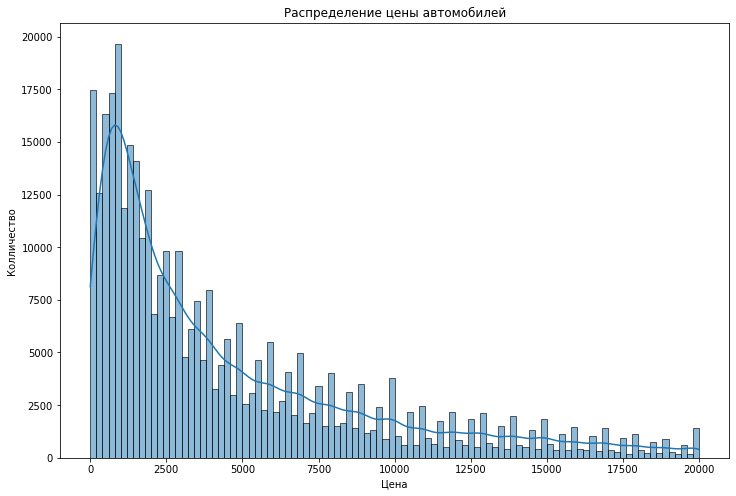

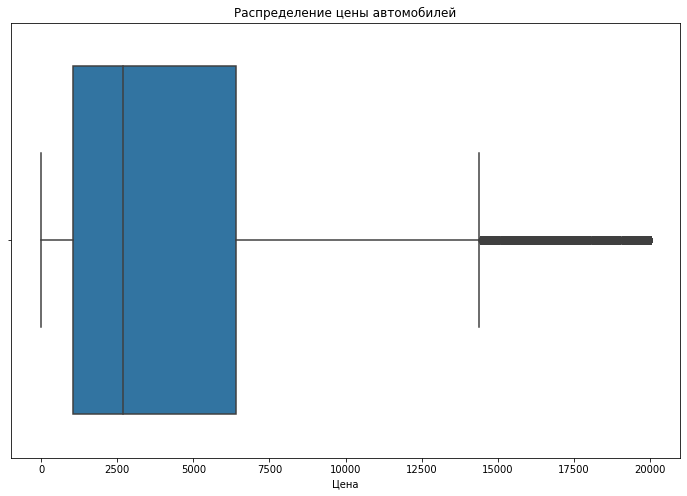

In [12]:
draw_distribution(df, 'Price', 'Цена', 'Колличество', 'Распределение цены автомобилей', 100)

Итак, видим, что тут у нас представлен типичный правый длинный хвост. Учитывая, какие года выпуска присутствуют в нашей выборке, то не будем считать это аномальными значениями и оставим эти данные для дальнейшего обучения модели. Но вот обратим внимание, что довольно много значений вокруг 0. Уберём их.

In [13]:
new_df = df.loc[df['Price'] != 0]

Мы знаем, что серийное производство автомобилей началось приблизительно в 1900 годах. Предположим, что теоретически такие автомобили живы и могут появляться на площадках. Так что 1900 будет нашей отправной точкой. С другой стороны, это раритетные автомобили, у которых потенциально другое ценообразование, но тем не менее пусть наша модель знает и их. Так как дата выгрузки составляет на период 2016 года, то и предел отсавим 2016 год. 

In [14]:
new_df[new_df['RegistrationYear'] < 1900].RegistrationYear.value_counts()

1000    31
1800     5
1234     4
1500     3
1300     2
1600     2
1400     1
1001     1
1255     1
1111     1
1039     1
1602     1
Name: RegistrationYear, dtype: int64

In [15]:
new_df = new_df.loc[(new_df['RegistrationYear'] >= 1900) & (new_df['RegistrationYear'] <= 2016)]

In [16]:
new_df.sample(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
151445,2016-04-02 01:57:32,8750,sedan,2007,manual,177,5er,150000,3,petrol,bmw,no,2016-04-02 00:00:00,0,45896,2016-04-06 04:16:22
339869,2016-03-11 11:54:32,1200,sedan,1997,manual,75,astra,150000,1,petrol,opel,no,2016-03-11 00:00:00,0,12589,2016-04-07 05:44:30
254918,2016-03-30 13:53:29,2900,convertible,2000,manual,116,golf,150000,8,petrol,volkswagen,NaN,2016-03-30 00:00:00,0,78713,2016-04-07 05:15:32
322439,2016-03-16 19:56:36,2700,coupe,1999,manual,170,other,125000,2,petrol,ford,no,2016-03-16 00:00:00,0,56626,2016-04-05 22:17:31
344439,2016-03-19 15:50:22,1111,sedan,2000,manual,155,156,150000,10,petrol,alfa_romeo,no,2016-03-19 00:00:00,0,90461,2016-03-20 17:48:51


Теперь Посмотрим на распределение по мощности автомбилей. т.к. данные представлены в л.с., то можно смело убрать до 1000

In [17]:
Power = new_df.loc[new_df['Power'] < 1000]

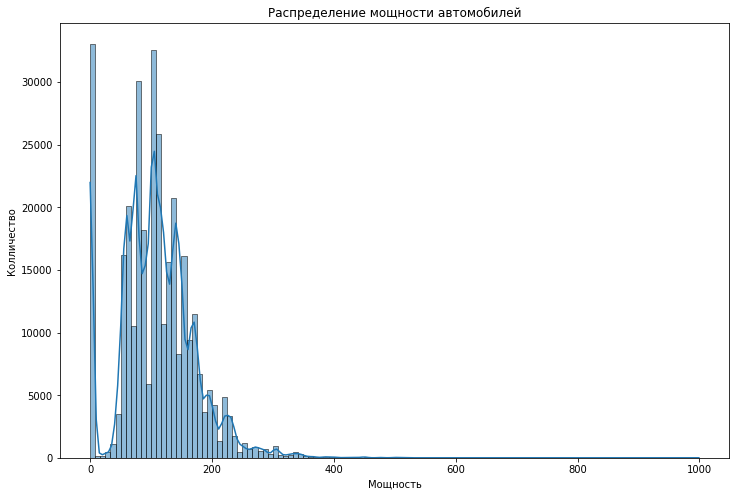

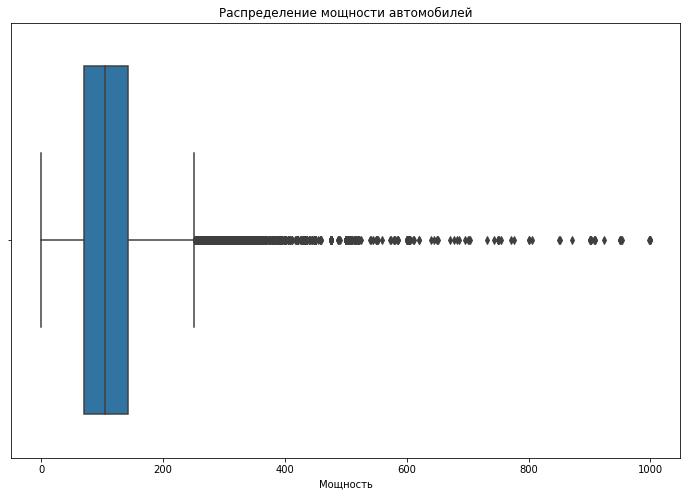

In [18]:
draw_distribution(Power, 'Power', 'Мощность', 'Колличество', 'Распределение мощности автомобилей', 120)

Видим, что тут тоже много значений возле 0, а так же выбросы начинаются ~ с 400 л.с.

In [19]:
new_df.loc[new_df['Power'] == 0].sample(15)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
267123,2016-03-27 01:00:03,1400,other,1970,manual,0,500,50000,3,petrol,fiat,no,2016-03-27 00:00:00,0,84091,2016-03-27 09:47:19
429,2016-03-24 18:55:31,11000,wagon,2010,auto,0,a4,150000,1,petrol,audi,no,2016-03-24 00:00:00,0,24837,2016-04-07 13:15:53
24045,2016-03-20 13:47:21,4700,coupe,2002,manual,0,c_klasse,150000,2,gasoline,mercedes_benz,NaN,2016-03-20 00:00:00,0,22111,2016-04-06 15:15:23
19544,2016-03-31 23:37:43,16500,NaN,2005,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-31 00:00:00,0,97447,2016-04-07 02:44:22
108008,2016-03-27 22:52:29,1490,convertible,1997,NaN,0,golf,150000,6,petrol,volkswagen,no,2016-03-27 00:00:00,0,23730,2016-04-06 01:15:28
95576,2016-03-16 15:46:00,4500,sedan,2003,manual,0,touareg,150000,9,gasoline,volkswagen,NaN,2016-03-16 00:00:00,0,51065,2016-03-16 15:46:00
265117,2016-03-17 16:38:08,1,NaN,2000,NaN,0,3er,150000,0,NaN,bmw,NaN,2016-03-17 00:00:00,0,52355,2016-03-30 10:46:16
241922,2016-03-28 21:56:04,300,other,1996,manual,0,NaN,125000,5,petrol,opel,yes,2016-03-28 00:00:00,0,87734,2016-04-03 04:18:46
112420,2016-03-31 21:55:34,1990,small,2003,NaN,0,2_reihe,150000,9,gasoline,peugeot,NaN,2016-03-31 00:00:00,0,49661,2016-04-06 18:17:55
155805,2016-03-18 07:53:17,1799,NaN,2005,manual,0,passat,150000,8,NaN,volkswagen,no,2016-03-18 00:00:00,0,51379,2016-03-18 08:46:21


Было предположение, что значения с нулём это сломанные автомобили с определённым значением в столбце NotRepaired, но нет. Это ошибка данных. Отфильтруем. Итак, отберём значения больше 0. Возьмём от 30 и до 600. Т.к. свыше 600 л.с. встретить практически невозможно.

In [20]:
new_df = new_df.loc[(new_df['Power'] >= 30) & (new_df['Power'] <= 600)]

Теперь глянем, что у нас лежит в столбце с пробегом.

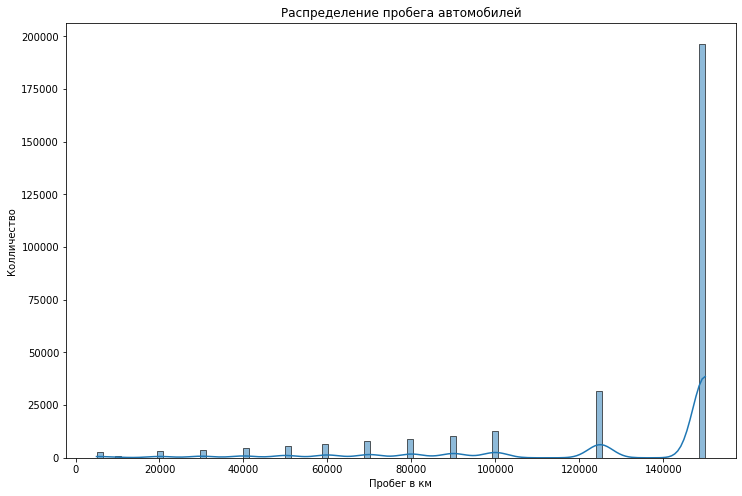

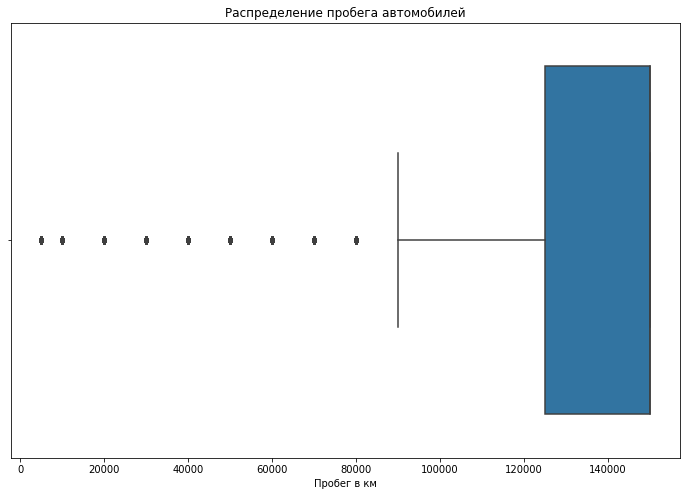

In [21]:
draw_distribution(new_df, 'Kilometer', 'Пробег в км', 'Колличество', 'Распределение пробега автомобилей', 100)

Итак, видим, что практически все значения лежат вокруг 150 тыс. км. Скорее всего на сайте при размещении объявления максимальный пробег обозначался как "более 150 000". 

Теперь обратим внимание на лишние столбцы. Т.к. в столбце NumberOfPictures отсутствуют значения, его можно удалить. Так же можно удалить столбцы с датой размещения объявления, даты скачивания, почтовый индекс пользователя и последняя активность. В данном исследовании они не несут никакой пользы для модели

In [22]:
new_df.drop(columns=['DateCreated', 'DateCrawled', 'NumberOfPictures', 'PostalCode', 'LastSeen'], inplace=True)

Теперь посмотрим на наши данные после первичной предобработки.

In [23]:
new_df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
count,295730.000000,295730.000000,295730.000000,295730.000000,295730.000000
mean,4857.343107,2002.857877,120.866885,128459.912758,5.995621
std,4613.887542,6.451136,53.709473,36591.068401,3.583233
min,1.000000,1910.000000,30.000000,5000.000000,0.000000
25%,1350.000000,1999.000000,76.000000,125000.000000,3.000000
50%,3200.000000,2003.000000,111.000000,150000.000000,6.000000
75%,6999.000000,2007.000000,150.000000,150000.000000,9.000000
max,20000.000000,2016.000000,600.000000,150000.000000,12.000000


Теперь всё выглядит более-менее прилично. Перейдём с следующему шагу. К обработке пропущенных значений в данных.

<b><font size=4>Обработка пропусков</font></b><a name="3.3."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

Посмотрим ещё раз на наши пропуски

In [24]:
new_df.isnull().sum()

Price                    0
VehicleType          10985
RegistrationYear         0
Gearbox               5315
Power                    0
Model                10943
Kilometer                0
RegistrationMonth        0
FuelType             15463
Brand                    0
NotRepaired          42746
dtype: int64

Посмотрим какие значения лежат в столбце Gearbox

In [25]:
new_df.Gearbox.value_counts(normalize=True)

manual    0.797638
auto      0.202362
Name: Gearbox, dtype: float64

Итак, видим, что у нас всего 2 вида коробки передач. Скорее всего в пропущеных значениях лежат автоммобили с иной коробкой передач. Например, вариатором. Пропущенные значения заменим на other

In [26]:
new_df.Gearbox = new_df.Gearbox.fillna('other')

В остальных случаях заменить пропущенные значения на unknown, т.к. восстановить нет возможности. Точнее вероятно всего будет искажение данных, т.к. у одной и той же модели может быть разный вид кузова, а так же разная топливная система. Так что не будем заниматься угадыванием и определим наши пропуски как unknown

In [27]:
new_df.Model = new_df.Model.fillna('unknown')
new_df.FuelType = new_df.FuelType.fillna('unknown') 
new_df.NotRepaired = new_df.NotRepaired.fillna('unknown')
new_df.VehicleType = new_df.VehicleType.fillna('unknown')


In [28]:
new_df.isnull().sum()

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
dtype: int64

Прежде чем перейдём к следующему шагу, то посмотрим на корреляцию медлу признаками

<b><font size=4>Кодировка данных</font></b><a name="3.4."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

Прежде чем приступить к кодировке наших данных, разделим нашу выборку на тестовую и обучающую. 

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295730 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              295730 non-null  int64 
 1   VehicleType        295730 non-null  object
 2   RegistrationYear   295730 non-null  int64 
 3   Gearbox            295730 non-null  object
 4   Power              295730 non-null  int64 
 5   Model              295730 non-null  object
 6   Kilometer          295730 non-null  int64 
 7   RegistrationMonth  295730 non-null  int64 
 8   FuelType           295730 non-null  object
 9   Brand              295730 non-null  object
 10  NotRepaired        295730 non-null  object
dtypes: int64(5), object(6)
memory usage: 27.1+ MB


In [30]:
features_train, features_test, target_train, target_test = train_test_split(
    new_df.drop(['Price'], axis=1), new_df['Price'], test_size=0.25, random_state=42)

Теперь перекодируем категориальные признаки.

In [31]:
ce_ord = ce.OrdinalEncoder(cols = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'])
features_train = ce_ord.fit_transform(features_train, target_train)
features_test = ce_ord.transform(features_test, target_test)

In [32]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train, target_train)
features_test = scaler.fit_transform(features_test, target_test)

<b><font size=5>Обучение моделей</font></b><a name="4."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

Прежде чем приступим к обучению модели, напишем функцию для вычисления скорости выполнения, а так же RMSE и сделаем оценку для кросс-валидации. 

In [33]:
def RMSE(target,predictions):
    MSE = mean_squared_error(target, predictions)
    return MSE ** 0.5
RMSE_score = make_scorer(RMSE, greater_is_better=False)

In [34]:
def best_model(model, params, features_train, target_train, features_test, target_test):
    start_time = time.time()
    grid = GridSearchCV(model, param_grid = params, cv=5,
                                            scoring = RMSE_score, n_jobs=-1)
    grid.fit(features_train,target_train)
    first_time = time.time() - start_time
    start_time = time.time()
    predict = grid.predict(features_test)
    second_time = time.time() - start_time
    return first_time, second_time, RMSE(target_test, predict)

Посмотрим на Лассо модели как работает наша функция.

In [35]:
lasso_model = Lasso(random_state=42)
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

In [36]:
lasso = best_model(lasso_model, lasso_params, features_train, target_train, features_test, target_test)

In [37]:
lasso

(10.959654331207275, 0.001995086669921875, 2980.6732961042867)

Отлично, на выходе у нас получается время обучения, время предсказания и наша метрика. Попробуем с другими моделями

Обучим LGBM модель

In [38]:
lgbm_params = {
    'n_estimators': [10,50,100],
    'max_depth': [15,30],
    'num_leaves': [10,20,31],
    'learning_rate': [0.1]
}
lgbm_reg_model = LGBMRegressor(random_state=42)

In [39]:
lgbm = best_model(lgbm_reg_model, lgbm_params, features_train, target_train, features_test, target_test)

Обучим CatBoost модель

In [40]:
catboost_params = {
    'learning_rate': [0.1],
    'iterations': [10,50,100],
    'max_depth': [10,20]
}
catboost_model = CatBoostRegressor(random_state=42,silent=True)


In [41]:
CatBoost = best_model(catboost_model, catboost_params, features_train, target_train, features_test, target_test)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2637.64626575            nan -1804.20049698            nan
 -1700.47213808            nan]
  warnings.warn(


Обучим RandomForest модель

In [42]:
RF_model = RandomForestRegressor(random_state=42)
forestregressor_params = {'n_estimators':range(10, 51, 10),
             'max_depth':range (1,10)}

In [43]:
RandomForest = best_model(RF_model, forestregressor_params, features_train, target_train, features_test, target_test)

Обучим DecisionTree модель

In [46]:
DT_model = DecisionTreeRegressor(random_state=42)
treeregressor_params = {'max_depth':range (1,10)}
DecisionTrees = best_model(DT_model, treeregressor_params, features_train, target_train, features_test, target_test)

Обучим константную модель

In [47]:
constant_model = DummyRegressor(strategy='mean')

In [48]:
constant_model.fit(features_train,target_train)
constant_pred = constant_model.predict(features_test)
RMSE(target_test,constant_pred)

4620.618257647878

In [49]:
Models = pd.DataFrame([lasso, lgbm, CatBoost, RandomForest, DecisionTrees], 
             columns=['Время обучения', 'Время предсказания', 'RMSE'], 
                      index=['Lasso','LGBM','CatBoost', 'RandomForest', 'DecisionTrees'])

In [50]:
Models

,Время обучения,Время предсказания,RMSE
Lasso,10.959654,0.001995,2980.673296
LGBM,25.132922,0.128980,1696.444768
CatBoost,31.032047,0.025995,1694.089497
RandomForest,420.049995,0.296252,2049.163253
DecisionTrees,13.467626,0.007975,2202.578208


<b><font size=5>Общий вывод</font></b><a name="5."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

Итак, модели обучены. Исходя из таблице выше можно сделать вывод, что:
1. Самое высокое качество предсказания у модели CatBoost
2. Самое быстрое время обучения у модели Lasso, но при этом низкое качество 
3. Самое быстрое время предсказания у Lasso, но при этом низкое качество 

Исходя из таблицы, то по всем трём параметрам выигрывает CatBoost, хоть и время обучения у неё выше, чем у LGBM, но качество и скорость предсказания намного выше. Так что можно сделать вывод, что наилучшая модель для заказчика это CatBoost.